In [82]:
%pylab inline
import pandas as pd
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


** 数据导入**

数据集来自`Asian development bank`,标题：Population - China, People's Republic of

csv URL：`https://www.quandl.com/api/v3/datasets/ADB/POP_CHN.csv`

In [100]:
data = pd.read_csv('https://www.quandl.com/api/v3/datasets/ADB/POP_CHN.csv', index_col=0, header=0, parse_dates=True)

将第一列日期设置为索引，第一行为标题列，格式化日期

In [101]:
data

,Total Population (million),Population Density (persons per square kilometer),Population Annual Change (percent),Urban Population (percent of total population)
Date,,,,
2014-12-31,1367.82,142.00000,0.521783,54.7700
2013-12-31,1360.72,141.39000,0.493338,53.7300
2012-12-31,1354.04,140.70000,0.496530,52.5700
2011-12-31,1347.35,140.00000,0.480271,51.2700
2010-12-31,1340.91,140.00000,0.480330,49.9500
2009-12-31,1334.50,139.03540,0.487000,48.4598
2008-12-31,1328.02,138.33542,0.508000,46.9900
2007-12-31,1321.29,137.63400,0.518080,45.8900
2006-12-31,1314.48,136.92500,0.529230,43.9000


将时间按照升序排序，查看它的大致信息

In [102]:
data = data.sort_index(ascending=True)
data.describe()

,Total Population (million),Population Density (persons per square kilometer),Population Annual Change (percent),Urban Population (percent of total population)
count,19.000000,19.000000,19.000000,19.000000
mean,1303.299474,135.686898,0.642083,42.964726
std,43.403837,4.429576,0.184486,7.654438
min,1223.890000,127.489580,0.480271,30.480000
25%,1271.850000,132.484375,0.502265,36.940000
50%,1307.560000,136.000000,0.588890,43.000000
75%,1337.705000,139.517700,0.729145,49.204900
max,1367.820000,142.000000,1.046890,54.770000


In [103]:
data['Total Population (million)']

Date
1996-12-31    1223.89
1997-12-31    1236.26
1998-12-31    1247.61
1999-12-31    1257.86
2000-12-31    1267.43
2001-12-31    1276.27
2002-12-31    1284.53
2003-12-31    1292.27
2004-12-31    1299.88
2005-12-31    1307.56
2006-12-31    1314.48
2007-12-31    1321.29
2008-12-31    1328.02
2009-12-31    1334.50
2010-12-31    1340.91
2011-12-31    1347.35
2012-12-31    1354.04
2013-12-31    1360.72
2014-12-31    1367.82
Name: Total Population (million), dtype: float64

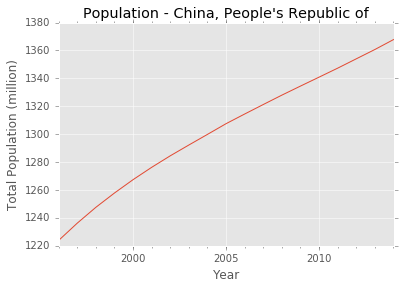

In [108]:
total_pop = data['Total Population (million)']
total_pop.plot()
xlabel('Year')
ylabel('Total Population (million)')
title('Population - China, People\'s Republic of')

由图可知，总体的人口增长与时间线性相关，选择线性模型：
$$y=ax+b$$

In [105]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x + b

xdata = arange(1996, 2015)
ydata = data['Total Population (million)'].values

popt, pcov = curve_fit(func, xdata, ydata)
popt

array([  7.67794737e+00,  -1.40909850e+04])

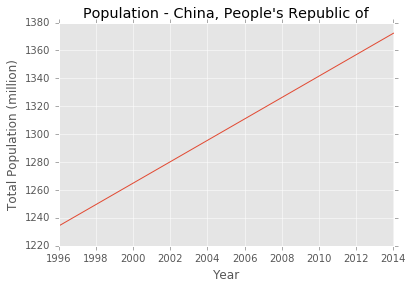

In [109]:
g = popt[0]*xdata + popt[1]
plot(xdata, g)
xlabel('Year')
ylabel('Total Population (million)')
title('Population - China, People\'s Republic of')